In [4]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/penguins_size.csv")
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


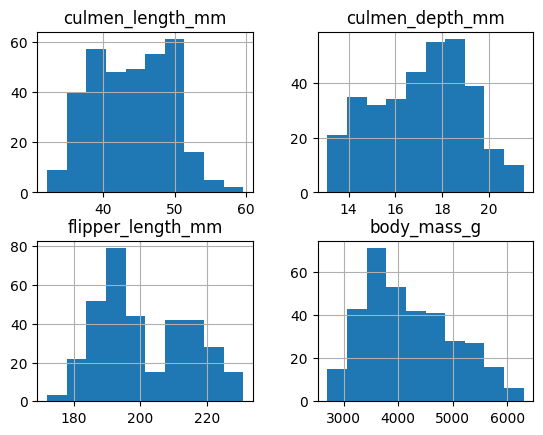

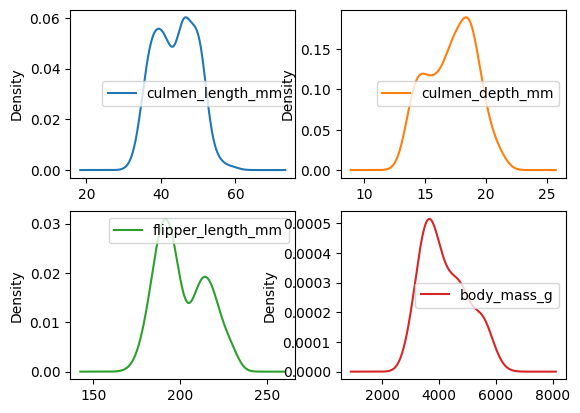

In [5]:
import matplotlib.pyplot as plt

# Histogram
dataset.hist()
plt.show()

# Density plot
dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()


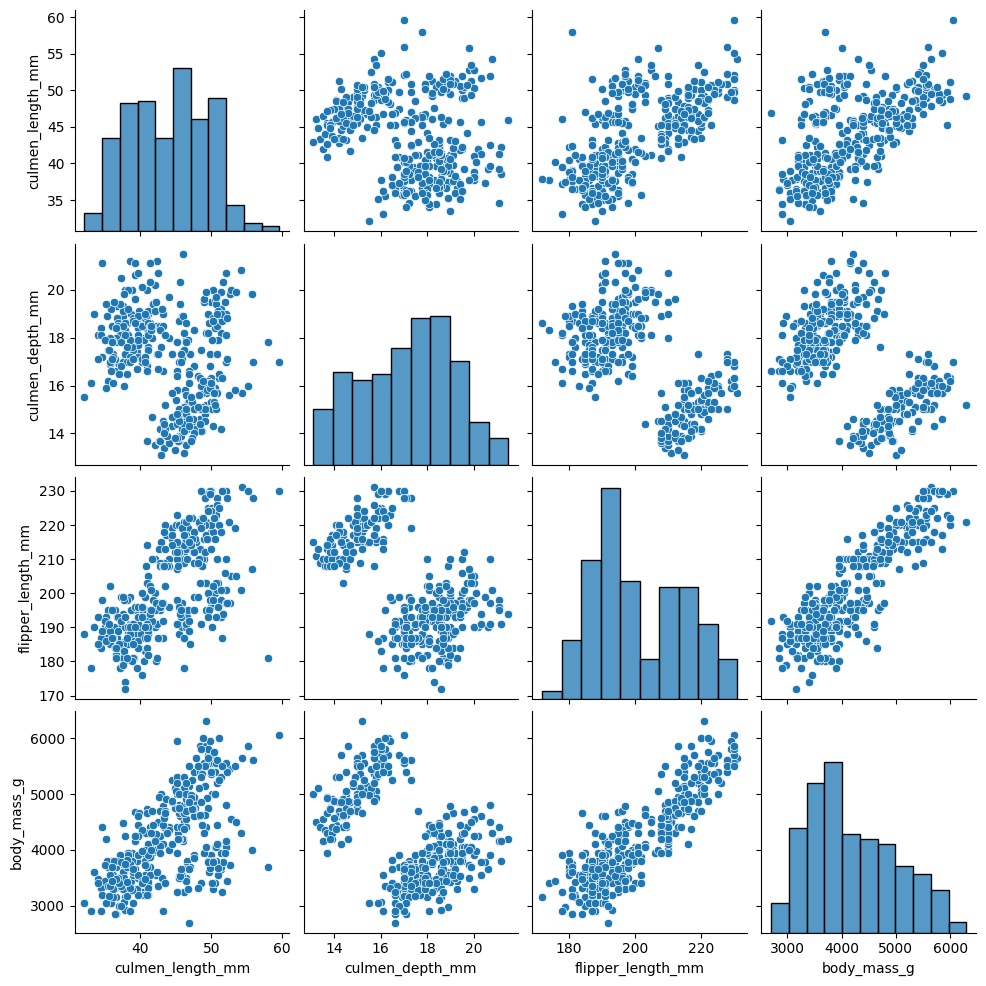

<ipython-input-7-93789be0f9f6>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


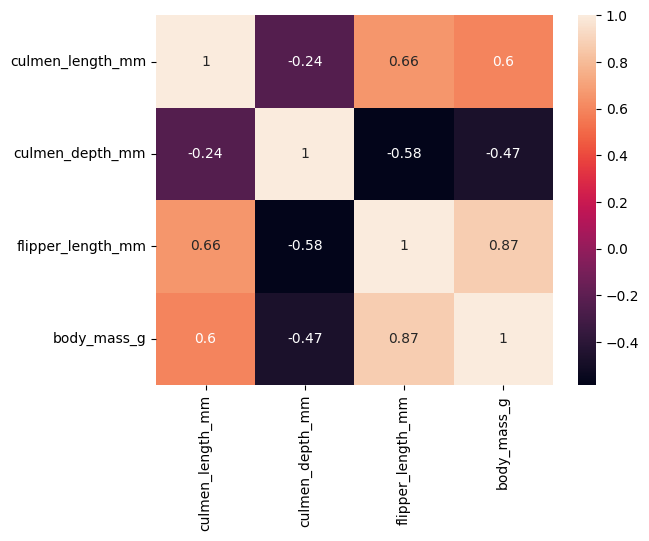

In [7]:
import seaborn as sns

# Scatter plot
sns.pairplot(dataset)
plt.show()

# Correlation matrix
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


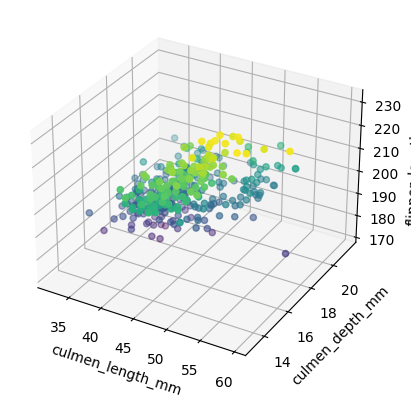

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset["culmen_length_mm"], dataset["culmen_depth_mm"], dataset["flipper_length_mm"], c=dataset["flipper_length_mm"])
ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('culmen_depth_mm')
ax.set_zlabel('flipper_length_mm')
plt.show()


In [61]:
print(dataset.describe())
df = dataset


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        344.000000       344.000000         344.000000   344.000000
mean          43.921930        17.151170          25.674419  4201.754386
std            5.443643         1.969027          13.660346   799.613058
min           32.100000        13.100000           0.000000  2700.000000
25%           39.275000        15.600000          15.000000  3550.000000
50%           44.250000        17.300000          22.000000  4050.000000
75%           48.500000        18.700000          38.000000  4750.000000
max           59.600000        21.500000          55.000000  6300.000000


In [62]:
# Check for missing values
df.isnull().sum()

# Replace missing values
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)


In [65]:
import numpy as np


# Find outliers using IQR
Q1 = df['culmen_length_mm'].quantile(0.25)
Q3 = df['culmen_length_mm'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['culmen_length_mm'] < (Q1 - 1.5 * IQR)) | (df['culmen_length_mm'] > (Q3 + 1.5 * IQR)))]

# Replace outliers
df['culmen_length_mm'] = np.where(df['culmen_length_mm'] > upper_bound, upper_bound, df['culmen_length_mm'])
df['culmen_length_mm'] = np.where(df['culmen_length_mm'] < lower_bound, lower_bound, df['culmen_length_mm'])


In [66]:
from sklearn.preprocessing import StandardScaler

# Check for categorical columns
cat_cols = dataset.select_dtypes(include=['object']).columns

# One-hot encoding
df = pd.get_dummies(dataset, columns=cat_cols)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [68]:
df['cluster'] = kmeans.labels_
df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE,cluster
0,39.10000,18.70000,6,3750.000000,1,0,0,0,0,1,0,0,1,2
1,39.50000,17.40000,11,3800.000000,1,0,0,0,0,1,0,1,0,2
2,40.30000,18.00000,20,3250.000000,1,0,0,0,0,1,0,1,0,2
3,43.92193,17.15117,55,4201.754386,1,0,0,0,0,1,0,0,0,2
4,36.70000,19.30000,18,3450.000000,1,0,0,0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,55,4201.754386,0,0,1,1,0,0,0,0,0,0
340,46.80000,14.30000,39,4850.000000,0,0,1,1,0,0,0,1,0,0
341,50.40000,15.70000,46,5750.000000,0,0,1,1,0,0,0,0,1,0
342,45.20000,14.80000,36,5200.000000,0,0,1,1,0,0,0,1,0,0


In [73]:
X = df.drop('species_Adelie', axis=1)
y = df['species_Adelie']


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [76]:
model.fit(X_train, y_train)


LogisticRegression()

In [78]:
y_pred = model.predict(X_test)


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9855072463768116
Precision: 1.0
Recall: 0.96875
F1 score: 0.9841269841269841
